# Darcy equation

In this tutorial we present how to solve a Darcy equation with [PyGeoN](https://github.com/compgeo-mox/pygeon) in themoving domain case (the upper boundary will move).  The unkwons are the velocity $u$, the elevation head $h$ and the height of the upper boundary $\eta$.

Let $\Omega=(0,1)\times(0,\eta)$ with boundary $\partial \Omega$ and outward unit normal ${\nu}$. Given 
$K$ the matrix permeability, we want to solve the following problem: find $(\bm{u}, h)$ such that
$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
K^{-1} {\bm{u}} + \nabla h = {0}\\
S_s \frac{\partial{h}}{\partial t} + \nabla \cdot {u} = f
\end{array}
&\text{in } \Omega
\end{array}
\right.
$$

In order to solve the problem, we will perfom a change of coordinates to a reference domain $\hat{\Omega}=(0,1)^2$ through the (linear) trasnformation $R : \Omega \rightarrow \hat{\Omega}$ (and its inverse function $D : \hat{\Omega} \rightarrow \Omega$).
Recall that $\hat{\nabla}R=(\nabla D)^{-1}$.

Let $\hat{h}$ and $\hat{\bm{u}}$ be $h$ and $\bm{u}$ respectevely in the reference domain and let $\hat{K}$ be the transformed permeability matrix, defined as $\hat{K}=det(\hat{\nabla}D) (\hat{\nabla} D)^{-1} K (\hat{\nabla} D)^{-T}$.

The equation describing the motion of $\partial_{top}\Omega$ is:
$$

\phi \frac{\partial \eta}{\partial t} = \hat{u_3} + I(t)

$$

The transformed equations in $\hat{\Omega}$ is:
$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\hat{K}({\eta})^{-1} {\hat{u}} + \hat{\nabla} \hat{h} = {0}\\
\hat{S}_s \frac{\partial{\hat{h}}}{\partial t} + \hat{\nabla} \cdot {\hat{\bm{u}}} = f
\end{array}
&\text{in } \hat{\Omega}
\end{array}
\right.
$$
with boundary conditions:
$$ \hat{h} = \eta \text{ on } \Gamma \qquad \hat{h} = \ell \text{ on } \Gamma_D \qquad \hat{\bm{\nu}} \cdot \hat{\bm{u}} = 0 \text{ on } \Gamma_N$$

The weak formulation will be:
$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\int_{\Omega}\hat{K}(\eta)^{-1} {\bm{\hat{u}}} \cdot \bm{v} \, d\Omega - \int_{\Omega} h \hat{\nabla} \cdot {\hat{\bm{v}}} \, d\Omega = - \int_{\Gamma_D} h \bm{v} \cdot \bm{\nu} \, d\Omega - \int_{\Gamma} \eta \bm{v} \cdot \bm{\nu} \, d\Omega\\
\int_{\Omega} \hat{S}_s \frac{\partial{\hat{h}}}{\partial t} v \, d\Omega + \int_{\Omega} \hat{\nabla} \cdot {\hat{\bm{u}}} v \, d\Omega = \int_{\Omega} fv \, d\Omega\\
\int_{\Gamma} \phi \frac{\partial \eta}{\partial t} v \, d\sigma = \int_{\Gamma} \hat{u_3} v \, d\sigma + \int_{\Gamma} I(t) v \, d\sigma
\end{array}
\end{array}
\right.
$$

For the time discretization, we will employ a backward Euler scheme:

$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\int_{\Omega}\hat{K}(\eta^{n+1})^{-1} {\bm{\hat{u}}^{n+1}} \cdot \bm{v} \, d\Omega - \int_{\Omega} h^{n+1} \hat{\nabla} \cdot {\hat{\bm{v}}} \, d\Omega = - \int_{\Gamma_D} h^{n+1} \bm{v} \cdot \bm{\nu} \, d\Omega - \int_{\Gamma} \eta^{n+1} \bm{v} \cdot \bm{\nu} \, d\Omega\\
\int_{\Omega} \hat{S}_s^{n+1} \frac{\hat{h}^{n+1} - \hat{h}^{n}}{\Delta t} v \, d\Omega + \int_{\Omega} \hat{\nabla} \cdot {\hat{\bm{u}}^{n+1}} v \, d\Omega = \int_{\Omega} f^{n+1}v \, d\Omega\\
\int_{\Gamma} \phi \eta^{n+1} v \, d\sigma = \Delta t \int_{\Gamma} \hat{\bm{u}}^{n+1} \cdot \bm{\nu} v \, d\sigma + \int_{\Gamma} \phi \eta^{n} v \, d\sigma + \Delta t \int_{\Gamma} I^{n+1} v \, d\sigma
\end{array}
\end{array}
\right.
$$

To deal with the non-linear term, we will employ a simple Picard scheme:

$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\int_{\Omega}\hat{K}(\eta^{n+1}_k)^{-1} {\bm{\hat{u}_{k+1}^{n+1}}} \cdot \bm{v} \, d\Omega - \int_{\Omega} h^{n+1}_{k+1} \hat{\nabla} \cdot {\hat{\bm{v}}} \, d\Omega + \int_{\Gamma} \eta^{n+1}_{k+1} \bm{v} \cdot \bm{\nu} \, d\Omega= - \int_{\Gamma_D} h^{n+1} \bm{v} \cdot \bm{\nu} \, d\Omega\\
\Delta t \int_{\Omega} \hat{\nabla} \cdot {\hat{\bm{u}}^{n+1}_{k+1}} v \, d\Omega + \int_{\Omega} \hat{S}_s \hat{h}^{n+1}_{k+1} v \, d\Omega = \int_{\Omega} \hat{S}_s \hat{h}^{n} v \, d\Omega + \Delta t \int_{\Omega} f^{n+1}v \, d\Omega\\
- \Delta t \int_{\Gamma} \hat{\bm{u}}^{n+1}_{k+1} \cdot \bm{\nu} v \, d\sigma + \int_{\Gamma} \phi \eta^{n+1}_{k+1} v \, d\sigma = \int_{\Gamma} \phi \eta^{n} v \, d\sigma + \Delta t \int_{\Gamma} I^{n+1} v \, d\sigma
\end{array}
\end{array}
\right.
$$

The matrix formulation will be:

$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
M_u(\bm{\eta}^{n+1}_{k}) \bm{u}^{n+1}_{k+1} + B^T\bm{h}^{n+1}_{k+1} + B_{\Gamma}^T \bm{\eta}^{n+1}_{k+1}= \bm{BC}^{n+1}\\
- \Delta t B \hat{\bm{u}}^{n+1}_{k+1} + S_s M_{h} \bm{\hat{h}^{n+1}_{k+1}} = \Delta t \bm{F}^{n+1} + S_s M_{h} \bm{\hat{h}^{n}}\\
- \Delta t B_{\Gamma} \hat{\bm{u}}^{n+1}_{k+1} + \phi M_{\Gamma} \bm{\eta^{n+1}_{k+1}} = \phi M_{\Gamma} \bm{\eta^{n}} + \Delta t \bm{I}^{n+1}
\end{array}
\end{array}
\right.
$$

$$
\left(
\begin{array}{cc} 
M_u(\bm{\eta^{n+1}_k}) & B^T & B_{\Gamma}^T\\
-\Delta t B & S_s M_h & 0\\
-\Delta t B_{\Gamma} & 0 & \phi M_{\Gamma}
\end{array}
\right)
\left(
\begin{array}{c} 
\bm{u^{n+1}_{k+1}}\\ 
\bm{h^{n+1}_{k+1}}\\
\bm{\eta^{n+1}_{k+1}}
\end{array}
\right)
=\left(
\begin{array}{c} 
\bm{BC}^{n+1}\\ 
\Delta t \bm{F}^{n+1} + S_s M_h \bm{h}^n\\
\phi M_{\Gamma} \bm{\eta}^n + \Delta t \bm{I}^{n+1}
\end{array}
\right)
$$

We will start to test the method in the case $M_u(\bm{h_k}^{n+1})=\bm{I}$

In [1]:
%load_ext Cython

In [2]:
import numpy as np
import scipy.sparse as sps
from math import ceil, floor, log10, exp, isnan
import os, shutil

import time
import sympy as sp

import porepy as pp
import pygeon as pg
import scipy.integrate as integrate

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import scipy as sc

/opt/conda/lib/python3.11/site-packages/porepy/numerics/nonlinear/nonlinear_solvers.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange  # type: ignore


In [3]:
output_directory = str(ceil(time.time())) + '_' + 'hard_coupling'

### Parameters

In [4]:
# Real domain dimensions
A = 3 # Height
B = 2 # Domain

# Set the number of steps (excluding the initial condition)
num_steps = 9

# Simulation time length
T = 9/48

# Time switch conditions (for the boundary condition)
dt_D = 3/48

In [5]:
# Van Genuchten model parameters ( relative permeability model )
theta_s = 0.396
theta_r = 0.131

alpha = 0.423

n = 2.06
K_s = 4.96e-2

m = 1 - 1/n

phi = (theta_s - theta_r)

def initial_h_func(x): return 1

In [6]:
# Set the maximum number of iterations of the non-linear solver
max_iterations_per_step = 1000

# L-scheme parameter
L   = 0.5

# Relative and absolute tolerances for the non-linear solver
abs_tol = 1e-10
rel_tol = 1e-5

numeric_tol = 1e-10

In [7]:
dt = (T-0) / num_steps
N = 10 # 16
quad_order = 1

# Domain tolerance
domain_tolerance = 1 / (10 * N)

In [8]:
verbose = False

### $\theta$ and $K$

In [9]:
# Symbolic psi
psi_var = sp.Symbol('psi', negative=True)

# Symbolic Theta
theta_expression = theta_r + (theta_s - theta_r) / (1 + (-alpha * psi_var) ** n) ** m
effective_saturation = (theta_expression - theta_r) / (theta_s - theta_r)

# Symbolic Conductivity K
conductivity_expression = K_s * (effective_saturation ** 0.5) * ( 1 - (1 - effective_saturation ** (1 / m)) ** m ) ** 2

In [10]:
# Theta lambda
theta_lambda = sp.lambdify(psi_var, theta_expression, 'numpy')

# Conductivity tensor lambda
conductivity_lambda = sp.lambdify(psi_var, conductivity_expression, 'numpy')

dtheta_lambda = sp.lambdify(psi_var, sp.diff(theta_expression, psi_var), 'numpy')

In [11]:
# Actual (and final) theta function
def theta(psi):
    mask = np.where(psi < 0)
    res = np.ones_like(psi) * theta_s
    res[mask] = theta_lambda(psi[mask])

    return res

In [12]:
# Actual (and final) theta function
def dtheta(psi):
    mask = np.where(psi < 0)
    res = np.zeros_like(psi)
    res[mask] = dtheta_lambda(psi[mask])

    return res

In [13]:
def conductivity(psi):
    if psi >= 0:
        return K_s
    return conductivity_lambda(psi)

### Grid and $V_h$

In [14]:
# convert the grid into a mixed-dimensional grid
darcy_grid = pp.StructuredTriangleGrid([N * ceil(B), N * round(1)], [B, 1])
darcy_grid.compute_geometry()
pg.convert_from_pp(darcy_grid)

In [15]:
# convert the grid into a mixed-dimensional grid
richards_grid = pp.StructuredTriangleGrid([N * ceil(B), N * round(A-1)], [B, 1])
richards_grid.compute_geometry()
pg.convert_from_pp(richards_grid)

In [16]:
boundary_grid, boundary_face_map, boundary_node_map = pp.partition.extract_subgrid(darcy_grid, darcy_grid.face_centers[1, :] == 1, faces=True)

In [17]:
key = "flow"

darcy_data = {}

In [18]:
darcy_field    = pg.Lagrange1(key)
richards_field = pg.Lagrange1(key)

gamma_field    = pg.Lagrange1(key)

In [19]:
fixed_rhs = np.zeros( darcy_grid.num_nodes + richards_grid.num_nodes - boundary_grid.num_nodes )

In [20]:
darcy_dof    =    darcy_field.ndof( darcy_grid )
richards_dof = richards_field.ndof( richards_grid )

boundary_dof = gamma_field.ndof( boundary_grid )

In [21]:
darcy_data = {}
richards_data = {}

### BC

##### Restrictor matrices

In [22]:
darcy_remove_boundary = np.zeros(shape=(darcy_dof - boundary_dof, darcy_dof))
darcy_remove_boundary[ np.arange(darcy_dof - boundary_dof), darcy_grid.nodes[1, :] < 1 ] = 1
darcy_remove_boundary = sps.csr_matrix(darcy_remove_boundary)

In [23]:
richards_remove_boundary = np.zeros(shape=(richards_dof - boundary_dof, richards_dof))
richards_remove_boundary[ np.arange(richards_dof - boundary_dof), richards_grid.nodes[1, :] > 0 ] = 1
richards_remove_boundary = sps.csr_matrix(richards_remove_boundary)

##### Dirichlet (essential)

In [24]:
darcy_dirichlet_flag  = np.array(darcy_remove_boundary @ (darcy_grid.nodes[0, :] == B), dtype=bool)
darcy_dirichlet_value = np.array(darcy_dirichlet_flag, dtype=float)

In [25]:
richards_dirichlet_flag  = np.array(richards_remove_boundary @ np.logical_and(richards_grid.nodes[1, :] == 1, richards_grid.nodes[0, :] < 1 ), dtype=bool)
richards_dirichlet_value = lambda t: np.array(richards_dirichlet_flag, dtype=float) * min(6.2, 1 + 5.2 * t / dt_D)

In [26]:
dirichlet_flag  = lambda t: np.hstack((darcy_dirichlet_flag, np.zeros(shape=boundary_dof, dtype=bool), richards_dirichlet_flag))
dirichlet_value = lambda t: np.hstack((darcy_dirichlet_value, np.zeros(shape=boundary_dof), richards_dirichlet_value(t)))

##### Neumann (natural)

In [27]:
# Full no-flow condition for the Neumann part.... nothing to add

### Mappings

In [28]:
eta_var = sp.Symbol('eta', negative=False)
x3_var  = sp.Symbol('x3',  negative=False)

In [29]:
darcy_chi_expr = eta_var * x3_var #x3_var*(eta_var + (2*eta_var - A) * x3_var * (1 - x3_var))
richards_chi_expr = eta_var + (A-eta_var) * (x3_var - 1)

chi_expr = sp.Piecewise( (darcy_chi_expr, x3_var < 1), (richards_chi_expr, True) )

In [30]:
darcy_chi    = sp.lambdify( [eta_var, x3_var],    darcy_chi_expr.simplify(), 'numpy' )
richards_chi = sp.lambdify( [eta_var, x3_var], richards_chi_expr.simplify(), 'numpy' )

general_chi = sp.lambdify([eta_var, x3_var], chi_expr.simplify(), 'numpy')

In [31]:
def darcy_real_height(eta_dofs, heights):
    return darcy_chi(eta_dofs, heights)

In [32]:
def richards_real_height(eta_dofs, heights):
    return richards_chi(eta_dofs, heights)

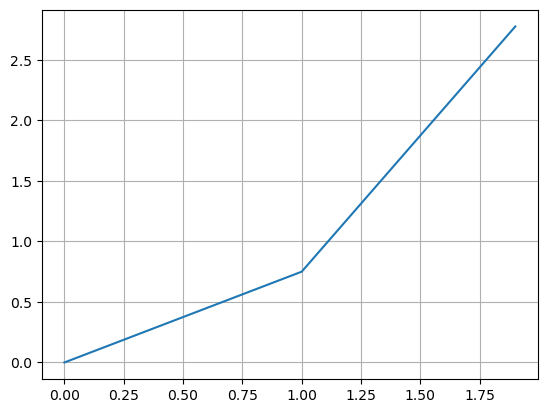

In [33]:
fig = plt.figure()
ax = fig.subplots()

ax.plot(np.arange(0, 2, 0.1), general_chi(0.75, np.arange(0, 2, 0.1)))
ax.grid()

fig.show()

##### Derivatives

In [34]:
darcy_chi_x3  = sp.lambdify( [eta_var, x3_var], sp.diff(darcy_chi_expr,  x3_var).simplify(), 'numpy' )
darcy_chi_eta = sp.lambdify( [eta_var, x3_var], sp.diff(darcy_chi_expr, eta_var).simplify(), 'numpy' )

In [35]:
richards_chi_x3  = sp.lambdify( [eta_var, x3_var], sp.diff(richards_chi_expr,  x3_var).simplify(), 'numpy' )
richards_chi_eta = sp.lambdify( [eta_var, x3_var], sp.diff(richards_chi_expr, eta_var).simplify(), 'numpy' )

### Matrix Assembly

##### Masks

In [36]:
darcy_mask = np.zeros(shape=(darcy_dof + richards_dof - boundary_dof), dtype=bool)
darcy_mask[ : (darcy_dof) ] = True

In [37]:
darcy_internal_mask = np.zeros_like(darcy_mask, dtype=bool)
darcy_internal_mask[ : (darcy_dof - boundary_dof) ] = True

In [38]:
richards_mask = np.zeros_like(darcy_mask, dtype=bool)
richards_mask[(darcy_dof-boundary_dof):] = True

In [39]:
richards_internal_mask = np.zeros_like(darcy_mask, dtype=bool)
richards_internal_mask[ darcy_dof : ] = True

In [40]:
boundary_mask = np.zeros_like(darcy_mask, dtype=bool)
boundary_mask[(darcy_dof - boundary_dof):(darcy_dof)] = True

##### Finite difference matrices

In [41]:
eta_diff = gamma_field.assemble_diff_matrix( boundary_grid )
eta_diff[0,0] = -1
eta_diff *= (N)

#### Stifness

In [42]:
%%cython
import numpy as np

def find_ordering(coord: np.array):
    lx = np.argmin(coord[0, :])
    rx = np.argmax(coord[0, :])
    mx = np.setdiff1d(np.array([0,1,2]), np.array([lx, rx]))[0]

    # Vertical Alignment
    if np.abs( coord[0, lx] - coord[0, mx] ) < 1e-7:
        # lx and mx vertical aligned, rx no
        up =   lx if np.argmax(coord[1, np.array([lx, mx])]) == 0 else mx
        down = lx if np.argmin(coord[1, np.array([lx, mx])]) == 0 else mx

        if np.abs( coord[1, up] - coord[1, rx] ) < 1e-7:
            return [up, down, rx]
        else:
            return [down, rx, up]
    else:
        # rx and mx vertical aligned, lx no
        up =   rx if np.argmax(coord[1, np.array([rx, mx])]) == 0 else mx
        down = rx if np.argmin(coord[1, np.array([rx, mx])]) == 0 else mx

        if np.abs( coord[1, up] - coord[1, lx] ) < 1e-7:
            return [up, lx, down]
        else:
            return [down, up, lx]

In [43]:
def compute_eta_x3(base_height: float, element_height: float, m, ls_eta, rs_eta, x, y):
    coord = lambda t: ((m+1) * (1-t) - (m-1) * t) / 2

    return (1-coord(y)) * ls_eta + coord(y) * rs_eta, base_height + coord(x) * element_height

In [44]:
def darcy_chi_x3_eta_gen( base_height: float, element_height: float, m, ls_eta, rs_eta, x, y ):
    eta, x3 = compute_eta_x3(base_height, element_height, m, ls_eta, rs_eta, x, y)

    return darcy_chi_x3(eta, x3), darcy_chi_eta(eta, x3)

In [45]:
def Darcy_K_func(base_height: float, base_width: float, element_height: float, element_width: float, m: int, ls_eta: float, rs_eta: float, grad_eta: float, x, y):
    chi_x3, chi_eta = darcy_chi_x3_eta_gen(base_height, element_height, m, ls_eta, rs_eta, x, y)

    return np.array([[             chi_x3,                            -chi_eta * grad_eta],
                     [-chi_eta * grad_eta, (1 + np.power(chi_eta * grad_eta, 2)) / chi_x3]]) * K_s #[:, :, 0]

    # This is the full version:
    #return np.array([[                  chi_x3 * k11,                                                    k12 - chi_eta * grad_eta * k11],
    #                 [k21 - chi_eta * grad_eta * k11, ( k22 + chi_eta * grad_eta * ( chi_eta * grad_eta * k11 - k12 - k21 ) ) / chi_x3 ]])

In [46]:
def richards_chi_x3_eta_gen( base_height: float, element_height: float, m, ls_eta, rs_eta, x, y ):
    eta, x3 = compute_eta_x3(base_height, element_height, m, ls_eta, rs_eta, x, y)

    return richards_chi_x3(eta, x3), richards_chi_eta(eta, x3)

In [47]:
def Richards_K_func(base_height: float, base_width: float, element_height: float, element_width: float, m: int, ls_eta: float, rs_eta: float, grad_eta: float, A: float, psi, x, y):
    chi_x3, chi_eta = richards_chi_x3_eta_gen(base_height, element_height, m, ls_eta, rs_eta, x, y)

    return np.array([[             chi_x3,                            -chi_eta * grad_eta],
                     [-chi_eta * grad_eta, (1 + np.power(chi_eta * grad_eta, 2)) / chi_x3]]) * conductivity(psi)

    # This is the full version:
    #return np.array([[                  chi_x3 * k11,                                                    k12 - chi_eta * grad_eta * k11],
    #                 [k21 - chi_eta * grad_eta * k11, ( k22 + chi_eta * grad_eta * ( chi_eta * grad_eta * k11 - k12 - k21 ) ) / chi_x3 ]])

In [48]:
def richards_local_A(coord, ls_eta, rs_eta, grad_eta, m, psi):
    ordering = find_ordering(coord)

    x0 = coord[:, ordering][:, 0]
    x1 = coord[:, ordering][:, 1]
    x2 = coord[:, ordering][:, 2]
    
    J_T_1_T = np.array([[x2[1]-x0[1], x0[1]-x1[1]],
                        [x0[0]-x2[0], x1[0]-x0[0]]]) / ((x1[0]-x0[0]) * (x2[1]-x0[1]) - (x2[0]-x0[0]) * (x1[1]-x0[1]))
    

    q_funcs = [J_T_1_T @ np.array([-1, -1]), J_T_1_T @ np.array([ 1, 0]), J_T_1_T @ np.array([0,  1])]

    M = np.zeros(shape=(3,3))

    jacobian = 1 / np.linalg.det( J_T_1_T.T )
    ordered_psi = psi[ordering]

    psi_fun = lambda x,y: ordered_psi[0] + (ordered_psi[1] - ordered_psi[0]) * x + (ordered_psi[2] - ordered_psi[0]) * y
        
    base_height = np.min(coord[1, :])
    base_width  = np.min(coord[0, :])
    
    element_height = np.max(coord[1, :]) - np.min(coord[1, :])
    element_width  = np.max(coord[0, :]) - np.min(coord[0, :])

    K_local = lambda x,y: Richards_K_func(base_height, base_width,
        element_height, element_width,
        m,
        ls_eta, rs_eta, grad_eta, A, psi_fun(x, y), x, y)

    for i in range(3):
        for j in range(3):
            integrand = lambda ys,x: np.array([q_funcs[j].T @ K_local(x, y) @ q_funcs[i] for y in np.array(ys)])
            inside = lambda xs, n: np.array([integrate.fixed_quad(integrand, 0, 1-x, args=(x,), n=n)[0] for x in np.array(xs)])
            M[ ordering[i], ordering[j] ] = jacobian * integrate.fixed_quad(inside, 0, 1, n=quad_order, args=(quad_order,))[0]

    return M

In [49]:
def darcy_local_A(coord, ls_eta, rs_eta, grad_eta, m):
    ordering = find_ordering(coord)

    x0 = coord[:, ordering][:, 0]
    x1 = coord[:, ordering][:, 1]
    x2 = coord[:, ordering][:, 2]
    
    J_T_1_T = np.array([[x2[1]-x0[1], x0[1]-x1[1]],
                        [x0[0]-x2[0], x1[0]-x0[0]]]) / ((x1[0]-x0[0]) * (x2[1]-x0[1]) - (x2[0]-x0[0]) * (x1[1]-x0[1]))
    

    q_funcs = [J_T_1_T @ np.array([-1, -1]), J_T_1_T @ np.array([ 1, 0]), J_T_1_T @ np.array([0,  1])]

    M = np.zeros(shape=(3,3))

    jacobian = 1 / np.linalg.det( J_T_1_T.T )
        
    base_height = np.min(coord[1, :])
    base_width  = np.min(coord[0, :])
    
    element_height = np.max(coord[1, :]) - np.min(coord[1, :])
    element_width  = np.max(coord[0, :]) - np.min(coord[0, :])
    
    K_local = lambda x,y: Darcy_K_func(base_height, base_width,
        element_height, element_width,
        m,
        ls_eta, rs_eta, grad_eta, x, y)

    for i in range(3):
        for j in range(3):
            integrand = lambda ys,x: np.array([q_funcs[j].T @ K_local(x, y) @ q_funcs[i] for y in np.array(ys)])
            inside = lambda xs, n: np.array([integrate.fixed_quad(integrand, 0, 1-x, args=(x,), n=n)[0] for x in np.array(xs)])
            M[ ordering[i], ordering[j] ] = jacobian * integrate.fixed_quad(inside, 0, 1, n=quad_order, args=(quad_order,))[0]

    return M

In [50]:
def darcy_stifness(eta_dofs):

    grad_eta = eta_diff @ eta_dofs
    
    size = np.power(darcy_grid.dim + 1, 2) * darcy_grid.num_cells
    rows_I = np.empty(size, dtype=int)
    cols_J = np.empty(size, dtype=int)
    data_IJ = np.empty(size)
    idx = 0

    _, _, _, _, _, node_coords = pp.map_geometry.map_grid(darcy_grid)
    _, _, sign = sps.find(darcy_grid.cell_faces)

    # Allocate the data to store matrix entries, that's the most efficient
    # way to create a sparse matrix.

    cell_nodes = darcy_grid.cell_nodes()

    for c in np.arange(darcy_grid.num_cells):
        # For the current cell retrieve its nodes
        loc = slice(cell_nodes.indptr[c], cell_nodes.indptr[c + 1])

        nodes_loc = cell_nodes.indices[loc]
        coord_loc = node_coords[:, nodes_loc]

        eta_cell = np.max(np.where( boundary_grid.nodes[0, :] < darcy_grid.cell_centers[0, c] ))

        # Compute the stiff-H1 local matrix
        A = darcy_local_A(coord_loc, eta_dofs[eta_cell], eta_dofs[eta_cell+1], grad_eta[eta_cell], np.prod(sign[loc]))

        # Save values for stiff-H1 local matrix in the global structure
        cols = np.tile(nodes_loc, (nodes_loc.size, 1))

        loc_idx = slice(idx, idx + cols.size)
        rows_I[loc_idx] = cols.T.ravel()
        cols_J[loc_idx] = cols.ravel()
        data_IJ[loc_idx] = A.ravel()
        idx += cols.size

    # Construct the global matrices
    return sps.csc_matrix((data_IJ, (rows_I, cols_J)))

In [51]:
def richards_stifness(eta_dofs, psi_dofs):

    grad_eta = eta_diff @ eta_dofs
    
    size = np.power(richards_grid.dim + 1, 2) * richards_grid.num_cells
    rows_I = np.empty(size, dtype=int)
    cols_J = np.empty(size, dtype=int)
    data_IJ = np.empty(size)
    idx = 0

    _, _, _, _, _, node_coords = pp.map_geometry.map_grid(richards_grid)
    _, _, sign = sps.find(richards_grid.cell_faces)

    # Allocate the data to store matrix entries, that's the most efficient
    # way to create a sparse matrix.

    cell_nodes = richards_grid.cell_nodes()

    for c in np.arange(richards_grid.num_cells):
        # For the current cell retrieve its nodes
        loc = slice(cell_nodes.indptr[c], cell_nodes.indptr[c + 1])

        nodes_loc = cell_nodes.indices[loc]
        coord_loc = node_coords[:, nodes_loc]

        coord_loc[1, :] += 1

        eta_cell = np.max(np.where( boundary_grid.nodes[0, :] < richards_grid.cell_centers[0, c] ))

        # Compute the stiff-H1 local matrix
        A = richards_local_A(coord_loc, eta_dofs[eta_cell], eta_dofs[eta_cell+1], grad_eta[eta_cell], np.prod(sign[loc]), psi_dofs[nodes_loc])

        # Save values for stiff-H1 local matrix in the global structure
        cols = np.tile(nodes_loc, (nodes_loc.size, 1))

        loc_idx = slice(idx, idx + cols.size)
        rows_I[loc_idx] = cols.T.ravel()
        cols_J[loc_idx] = cols.ravel()
        data_IJ[loc_idx] = A.ravel()
        idx += cols.size

    # Construct the global matrices
    return sps.csc_matrix((data_IJ, (rows_I, cols_J)))

#### Mass matrices

In [52]:
def local_mass(coord, chi_x3_func_gen, ls_eta, rs_eta, m):
    ordering = find_ordering(coord)

    x0 = coord[:, ordering][:, 0]
    x1 = coord[:, ordering][:, 1]
    x2 = coord[:, ordering][:, 2]

    qs = [(lambda x,y: 1-x-y), (lambda x,y: x), (lambda x,y: y)]
    
    J = np.array([[x1[0]-x0[0], x2[0]-x0[0]],
                  [x1[1]-x0[1], x2[1]-x0[1]]])
    
    jacobian = np.linalg.det(J)
    M = np.zeros(shape=(3,3))

    base_height = np.min(coord[1, :])
    element_height = np.max(coord[1, :]) - base_height

    chi_x3 = lambda x,y: chi_x3_func_gen(base_height, element_height, m, ls_eta, rs_eta, x, y)[0]

    for i in range(3):
        for j in range(3):
            integrand = lambda ys,x: np.array([qs[j](x,y) * qs[i](x,y) * chi_x3(x, y) for y in np.array(ys)])
            inside = lambda xs, n: np.array([integrate.fixed_quad(integrand, 0, 1-x, args=(x,), n=n)[0] for x in np.array(xs)])
            tmp = integrate.fixed_quad(inside, 0, 1, n=3, args=(3,))[0]

            M[ ordering[i], ordering[j] ] = tmp * jacobian

    return M

In [53]:
local_mass(np.array([[0, 1, 0], [0, 0, 1]]), darcy_chi_x3_eta_gen, 1, 1, 1)

array([[0.08333333, 0.04166667, 0.04166667],
       [0.04166667, 0.08333333, 0.04166667],
       [0.04166667, 0.04166667, 0.08333333]])

In [54]:
local_mass(np.array([[0, 1, 0], [1, 1, 2]]), richards_chi_x3_eta_gen, 1, 1, 1)

array([[0.16666667, 0.08333333, 0.08333333],
       [0.08333333, 0.16666667, 0.08333333],
       [0.08333333, 0.08333333, 0.16666667]])

In [55]:
def darcy_mass(eta_dofs):
    size = np.power(darcy_grid.dim + 1, 2) * darcy_grid.num_cells
    rows_I = np.empty(size, dtype=int)
    cols_J = np.empty(size, dtype=int)
    data_IJ = np.empty(size)
    idx = 0
    _, _, _, _, _, node_coords = pp.map_geometry.map_grid(darcy_grid)

    # Allocate the data to store matrix entries, that's the most efficient
    # way to create a sparse matrix.

    cell_nodes = darcy_grid.cell_nodes()
    _, _, sign = sps.find(darcy_grid.cell_faces)
        
    for c in np.arange(darcy_grid.num_cells):
        # For the current cell retrieve its nodes
        loc = slice(cell_nodes.indptr[c], cell_nodes.indptr[c + 1])

        nodes_loc = cell_nodes.indices[loc]
        coord_loc = node_coords[:, nodes_loc]

        # Compute the stiff-H1 local matrix
            
        eta_cell = np.max(np.where( boundary_grid.nodes[0, :] < darcy_grid.cell_centers[0, c] ))

        A = local_mass(coord_loc, darcy_chi_x3_eta_gen, eta_dofs[eta_cell], eta_dofs[eta_cell+1], np.prod(sign[loc]))

        # Save values for stiff-H1 local matrix in the global structure
        cols = np.tile(nodes_loc, (nodes_loc.size, 1))

        loc_idx = slice(idx, idx + cols.size)
        rows_I[loc_idx] = cols.T.ravel()
        cols_J[loc_idx] = cols.ravel()
        data_IJ[loc_idx] = A.ravel()
        idx += cols.size

    # Construct the global matrices
    return sps.csc_matrix((data_IJ, (rows_I, cols_J)))

In [56]:
def richards_mass(eta_dofs):
    size = np.power(richards_grid.dim + 1, 2) * richards_grid.num_cells
    rows_I = np.empty(size, dtype=int)
    cols_J = np.empty(size, dtype=int)
    data_IJ = np.empty(size)
    idx = 0
    _, _, _, _, _, node_coords = pp.map_geometry.map_grid(richards_grid)

    # Allocate the data to store matrix entries, that's the most efficient
    # way to create a sparse matrix.

    cell_nodes = richards_grid.cell_nodes()
    _, _, sign = sps.find(richards_grid.cell_faces)
        
    for c in np.arange(richards_grid.num_cells):
        # For the current cell retrieve its nodes
        loc = slice(cell_nodes.indptr[c], cell_nodes.indptr[c + 1])

        nodes_loc = cell_nodes.indices[loc]
        coord_loc = 1+node_coords[:, nodes_loc]

        # Compute the stiff-H1 local matrix
            
        eta_cell = np.max(np.where( boundary_grid.nodes[0, :] < richards_grid.cell_centers[0, c] ))

        A = local_mass(coord_loc, richards_chi_x3_eta_gen, eta_dofs[eta_cell], eta_dofs[eta_cell+1], np.prod(sign[loc]))

        # Save values for stiff-H1 local matrix in the global structure
        cols = np.tile(nodes_loc, (nodes_loc.size, 1))

        loc_idx = slice(idx, idx + cols.size)
        rows_I[loc_idx] = cols.T.ravel()
        cols_J[loc_idx] = cols.ravel()
        data_IJ[loc_idx] = A.ravel()
        idx += cols.size

    # Construct the global matrices
    return sps.csc_matrix((data_IJ, (rows_I, cols_J)))

def local_mass_eta(coord, chi_x3_func_gen, ls_eta, rs_eta, m):
    ordering = find_ordering(coord)

    x0 = coord[:, ordering][:, 0]
    x1 = coord[:, ordering][:, 1]
    x2 = coord[:, ordering][:, 2]

    qs   = [(lambda x,y: 1-x-y), (lambda x,y: x), (lambda x,y: y)]
    etas = [(lambda x,y: -(m-1)/2*(1-y)+(m+1)/2*y), (lambda x,y: (m+1)/2*(1-y)-(m-1)/2*y)]
    
    J = np.array([[x1[0]-x0[0], x2[0]-x0[0]],
                  [x1[1]-x0[1], x2[1]-x0[1]]])
    
    jacobian = np.linalg.det(J)
    M = np.zeros(shape=(3,2))

    base_height = np.min(coord[1, :])
    element_height = np.max(coord[1, :]) - base_height

    chi_x3 = lambda x,y: chi_x3_func_gen(base_height, element_height, m, ls_eta, rs_eta, x, y)[0]

    for i in range(3):
        for j in range(2):
            integrand = lambda ys,x: np.array([etas[j](x,y) * qs[i](x,y) * chi_x3(x, y) for y in np.array(ys)])
            inside = lambda xs, n: np.array([integrate.fixed_quad(integrand, 0, 1-x, args=(x,), n=n)[0] for x in np.array(xs)])
            tmp = integrate.fixed_quad(inside, 0, 1, n=3, args=(3,))[0]

            M[ ordering[i], ordering[j] ] = tmp * jacobian

    return M

In [57]:
def local_A_dtheta(coord, ls_eta, rs_eta, m, psi):
    ordering = find_ordering(coord)

    x0 = coord[:, ordering][:, 0]
    x1 = coord[:, ordering][:, 1]
    x2 = coord[:, ordering][:, 2]

    qs = [(lambda x,y: 1-x-y), (lambda x,y: x), (lambda x,y: y)]
    
    J = np.array([[x1[0]-x0[0], x2[0]-x0[0]],
                  [x1[1]-x0[1], x2[1]-x0[1]]])
    
    jacobian = np.linalg.det(J)
    M = np.zeros(shape=(3,3))

    base_height = np.min(coord[1, :])
    element_height = np.max(coord[1, :]) - base_height

    ordered_psi = psi[ordering]

    chi_x3       = lambda x,y: richards_chi_x3_eta_gen(base_height, element_height, m, ls_eta, rs_eta, x, y)[0]
    dtheta_local = lambda x,y: dtheta( np.array([ordered_psi[0] + (ordered_psi[1] - ordered_psi[0]) * x + (ordered_psi[2] - ordered_psi[0]) * y]) )[0]

    for i in range(3):
        for j in range(3):
            integrand = lambda ys,x: np.array([qs[j](x,y) * qs[i](x,y) * chi_x3(x, y) * dtheta_local(x, y) for y in np.array(ys)])
            inside = lambda xs, n: np.array([integrate.fixed_quad(integrand, 0, 1-x, args=(x,), n=n)[0] for x in np.array(xs)])
            tmp = integrate.fixed_quad(inside, 0, 1, n=3, args=(3,))[0]

            M[ ordering[i], ordering[j] ] = tmp * jacobian

    return M

In [58]:
def local_A_eta(coord, ls_eta, rs_eta, m, psi):
    ordering = find_ordering(coord)

    x0 = coord[:, ordering][:, 0]
    x1 = coord[:, ordering][:, 1]
    x2 = coord[:, ordering][:, 2]

    qs   = [(lambda x,y: 1-x-y), (lambda x,y: x), (lambda x,y: y)]

    left = lambda x,y: (m+1)/2*y-(m-1)/2*(1-y)
    etas = [left, (lambda x,y: 1-left(x,y))]
    
    J = np.array([[x1[0]-x0[0], x2[0]-x0[0]],
                  [x1[1]-x0[1], x2[1]-x0[1]]])
    
    jacobian = np.linalg.det(J)
    M = np.zeros(shape=(3,2))

    base_height = np.min(coord[1, :])
    element_height = np.max(coord[1, :]) - base_height

    ordered_psi = psi[ordering]

    chi_x3       = lambda x,y: richards_chi_x3_eta_gen(base_height, element_height, m, ls_eta, rs_eta, x, y)[0]
    dtheta_local = lambda x,y: dtheta( np.array([ordered_psi[0] + (ordered_psi[1] - ordered_psi[0]) * x + (ordered_psi[2] - ordered_psi[0]) * y]) )[0]
    x3 = lambda x,y: compute_eta_x3(base_height, element_height, m, ls_eta, rs_eta, x, y)[0]

    for i in range(3):
        for j in range(2):
            integrand = lambda ys,x: np.array([etas[j](x,y) * qs[i](x,y) * chi_x3(x, y) * dtheta_local(x, y) * (2 - x3(x, y)) for y in np.array(ys)])
            inside = lambda xs, n: np.array([integrate.fixed_quad(integrand, 0, 1-x, args=(x,), n=n)[0] for x in np.array(xs)])
            tmp = integrate.fixed_quad(inside, 0, 1, n=3, args=(3,))[0]

            M[ ordering[i], j ] = tmp * jacobian

    return M

In [59]:
def richards_mass_dtheta(eta_dofs, psi_dofs):
    size = (np.power(richards_grid.dim + 1, 2) * richards_grid.num_cells)
    rows_I = np.empty(size, dtype=int)
    cols_J = np.empty(size, dtype=int)
    data_IJ = np.empty(size)
    idx = 0
    _, _, _, _, _, node_coords = pp.map_geometry.map_grid(richards_grid)

    # Allocate the data to store matrix entries, that's the most efficient
    # way to create a sparse matrix.

    cell_nodes = richards_grid.cell_nodes()
    _, _, sign = sps.find(richards_grid.cell_faces)
        
    for c in np.arange(richards_grid.num_cells):
        # For the current cell retrieve its nodes
        loc = slice(cell_nodes.indptr[c], cell_nodes.indptr[c + 1])

        nodes_loc = cell_nodes.indices[loc]
        coord_loc = node_coords[:, nodes_loc]

        coord_loc[1, :] += 1

        # Compute the stiff-H1 local matrix
            
        eta_cell = np.max(np.where( boundary_grid.nodes[0, :] < richards_grid.cell_centers[0, c] ))

        A = local_A_dtheta(coord_loc, eta_dofs[eta_cell], eta_dofs[eta_cell+1], np.prod(sign[loc]), psi_dofs[nodes_loc])

        # Save values for stiff-H1 local matrix in the global structure
        cols = np.tile(nodes_loc, (nodes_loc.size, 1))

        loc_idx = slice(idx, idx + cols.size)

        rows_I[loc_idx] = cols.T.ravel()
        cols_J[loc_idx] = cols.ravel()
        data_IJ[loc_idx] = A.ravel()
        idx += cols.size

    # Construct the global matrices
    return sps.csc_matrix((data_IJ, (rows_I, cols_J)))

In [60]:
def richards_mass_eta(eta_dofs, psi_dofs):
    size = ceil((np.power(richards_grid.dim + 1, 2) * richards_grid.num_cells) / 3 * 2)
    rows_I = np.empty(size, dtype=int)
    cols_J = np.empty(size, dtype=int)
    data_IJ = np.empty(size)
    idx = 0
    _, _, _, _, _, node_coords = pp.map_geometry.map_grid(richards_grid)

    # Allocate the data to store matrix entries, that's the most efficient
    # way to create a sparse matrix.

    cell_nodes = richards_grid.cell_nodes()
    _, _, sign = sps.find(richards_grid.cell_faces)
        
    for c in np.arange(richards_grid.num_cells):
        # For the current cell retrieve its nodes
        loc = slice(cell_nodes.indptr[c], cell_nodes.indptr[c + 1])

        nodes_loc = cell_nodes.indices[loc]
        coord_loc = node_coords[:, nodes_loc]

        coord_loc[1, :] += 1

        # Compute the stiff-H1 local matrix
            
        eta_cell = np.max(np.where( boundary_grid.nodes[0, :] < richards_grid.cell_centers[0, c] ))

        A = local_A_eta(coord_loc, eta_dofs[eta_cell], eta_dofs[eta_cell+1], np.prod(sign[loc]), psi_dofs[nodes_loc])

        # Save values for stiff-H1 local matrix in the global structure
        cols = np.tile(nodes_loc, (nodes_loc.size, 1))[:2, :]

        loc_idx = slice(idx, idx + cols.size)

        rows_I[loc_idx] = cols.T.ravel()
        cols_J[loc_idx] = np.tile(np.array([eta_cell, eta_cell+1]), 3)
        data_IJ[loc_idx] = A.ravel()
        idx += cols.size

    # Construct the global matrices
    return sps.csc_matrix((data_IJ, (rows_I, cols_J)))

#### Projection matrices

In [61]:
darcy_proj    =    darcy_field.eval_at_cell_centers( darcy_grid )
richards_proj = richards_field.eval_at_cell_centers( richards_grid )

#### Restrictor matrices

In [62]:
darcy_restrict_to_boundary = np.zeros(shape=(boundary_dof, darcy_dof))
darcy_restrict_to_boundary[np.arange(boundary_dof), darcy_grid.nodes[1, :] == 1] = 1

In [63]:
richards_restrict_to_boundary = np.zeros(shape=(boundary_dof, richards_dof))
richards_restrict_to_boundary[np.arange(boundary_dof), richards_grid.nodes[1, :] == 0] = 1

### Solve System

In [64]:
if os.path.exists(output_directory):
    shutil.rmtree(output_directory)

In [65]:
# Fixed rhs
fixed_rhs = np.zeros(darcy_dof + richards_dof - boundary_dof)

In [66]:
# Initial conditions
sol = [np.zeros_like(fixed_rhs)]
sol[-1][darcy_mask] = darcy_field.interpolate( darcy_grid, initial_h_func )
sol[-1][richards_mask] = richards_field.interpolate( richards_grid, initial_h_func )

In [67]:
def save_step(sol, savers, i):

    for saver, proj, mask, grid, heights in zip(savers, [darcy_proj, richards_proj], [darcy_mask, richards_mask], [darcy_grid, richards_grid], [darcy_real_height(np.tile(sol[boundary_mask], ceil(darcy_grid.num_nodes / boundary_grid.num_nodes)), darcy_grid.nodes[1,:]), 
                                                                                                                                                richards_real_height(np.tile(sol[boundary_mask], ceil(richards_grid.num_nodes / boundary_grid.num_nodes)), 1+richards_grid.nodes[1, :])]):
        ins = list()

        ins.append((grid, "cell_h", proj @ sol[mask]))
        ins.append((grid, "cell_p", proj @ (sol[mask] - heights)))

        saver.write_vtu(ins, time_step=i)

In [68]:
# Save the initial solution
savers = [pp.Exporter(darcy_grid, 'sol_D', folder_name=output_directory), 
          pp.Exporter(richards_grid, 'sol_R', folder_name=output_directory)]
save_step(sol[-1], savers, 0)

In [69]:
csv_base = os.path.join(output_directory, 'csv')
os.mkdir( csv_base )

In [70]:
cm_data = [
    [0.2422, 0.1504, 0.6603],
    [0.2444, 0.1534, 0.6728],
    [0.2464, 0.1569, 0.6847],
    [0.2484, 0.1607, 0.6961],
    [0.2503, 0.1648, 0.7071],
    [0.2522, 0.1689, 0.7179],
    [0.2540, 0.1732, 0.7286],
    [0.2558, 0.1773, 0.7393],
    [0.2576, 0.1814, 0.7501],
    [0.2594, 0.1854, 0.7610],
    [0.2611, 0.1893, 0.7719],
    [0.2628, 0.1932, 0.7828],
    [0.2645, 0.1972, 0.7937],
    [0.2661, 0.2011, 0.8043],
    [0.2676, 0.2052, 0.8148],
    [0.2691, 0.2094, 0.8249],
    [0.2704, 0.2138, 0.8346],
    [0.2717, 0.2184, 0.8439],
    [0.2729, 0.2231, 0.8528],
    [0.2740, 0.2280, 0.8612],
    [0.2749, 0.2330, 0.8692],
    [0.2758, 0.2382, 0.8767],
    [0.2766, 0.2435, 0.8840],
    [0.2774, 0.2489, 0.8908],
    [0.2781, 0.2543, 0.8973],
    [0.2788, 0.2598, 0.9035],
    [0.2794, 0.2653, 0.9094],
    [0.2798, 0.2708, 0.9150],
    [0.2802, 0.2764, 0.9204],
    [0.2806, 0.2819, 0.9255],
    [0.2809, 0.2875, 0.9305],
    [0.2811, 0.2930, 0.9352],
    [0.2813, 0.2985, 0.9397],
    [0.2814, 0.3040, 0.9441],
    [0.2814, 0.3095, 0.9483],
    [0.2813, 0.3150, 0.9524],
    [0.2811, 0.3204, 0.9563],
    [0.2809, 0.3259, 0.9600],
    [0.2807, 0.3313, 0.9636],
    [0.2803, 0.3367, 0.9670],
    [0.2798, 0.3421, 0.9702],
    [0.2791, 0.3475, 0.9733],
    [0.2784, 0.3529, 0.9763],
    [0.2776, 0.3583, 0.9791],
    [0.2766, 0.3638, 0.9817],
    [0.2754, 0.3693, 0.9840],
    [0.2741, 0.3748, 0.9862],
    [0.2726, 0.3804, 0.9881],
    [0.2710, 0.3860, 0.9898],
    [0.2691, 0.3916, 0.9912],
    [0.2670, 0.3973, 0.9924],
    [0.2647, 0.4030, 0.9935],
    [0.2621, 0.4088, 0.9946],
    [0.2591, 0.4145, 0.9955],
    [0.2556, 0.4203, 0.9965],
    [0.2517, 0.4261, 0.9974],
    [0.2473, 0.4319, 0.9983],
    [0.2424, 0.4378, 0.9991],
    [0.2369, 0.4437, 0.9996],
    [0.2311, 0.4497, 0.9995],
    [0.2250, 0.4559, 0.9985],
    [0.2189, 0.4620, 0.9968],
    [0.2128, 0.4682, 0.9948],
    [0.2066, 0.4743, 0.9926],
    [0.2006, 0.4803, 0.9906],
    [0.1950, 0.4861, 0.9887],
    [0.1903, 0.4919, 0.9867],
    [0.1869, 0.4975, 0.9844],
    [0.1847, 0.5030, 0.9819],
    [0.1831, 0.5084, 0.9793],
    [0.1818, 0.5138, 0.9766],
    [0.1806, 0.5191, 0.9738],
    [0.1795, 0.5244, 0.9709],
    [0.1785, 0.5296, 0.9677],
    [0.1778, 0.5349, 0.9641],
    [0.1773, 0.5401, 0.9602],
    [0.1768, 0.5452, 0.9560],
    [0.1764, 0.5504, 0.9516],
    [0.1755, 0.5554, 0.9473],
    [0.1740, 0.5605, 0.9432],
    [0.1716, 0.5655, 0.9393],
    [0.1686, 0.5705, 0.9357],
    [0.1649, 0.5755, 0.9323],
    [0.1610, 0.5805, 0.9289],
    [0.1573, 0.5854, 0.9254],
    [0.1540, 0.5902, 0.9218],
    [0.1513, 0.5950, 0.9182],
    [0.1492, 0.5997, 0.9147],
    [0.1475, 0.6043, 0.9113],
    [0.1461, 0.6089, 0.9080],
    [0.1446, 0.6135, 0.9050],
    [0.1429, 0.6180, 0.9022],
    [0.1408, 0.6226, 0.8998],
    [0.1383, 0.6272, 0.8975],
    [0.1354, 0.6317, 0.8953],
    [0.1321, 0.6363, 0.8932],
    [0.1288, 0.6408, 0.8910],
    [0.1253, 0.6453, 0.8887],
    [0.1219, 0.6497, 0.8862],
    [0.1185, 0.6541, 0.8834],
    [0.1152, 0.6584, 0.8804],
    [0.1119, 0.6627, 0.8770],
    [0.1085, 0.6669, 0.8734],
    [0.1048, 0.6710, 0.8695],
    [0.1009, 0.6750, 0.8653],
    [0.0964, 0.6789, 0.8609],
    [0.0914, 0.6828, 0.8562],
    [0.0855, 0.6865, 0.8513],
    [0.0789, 0.6902, 0.8462],
    [0.0713, 0.6938, 0.8409],
    [0.0628, 0.6972, 0.8355],
    [0.0535, 0.7006, 0.8299],
    [0.0433, 0.7039, 0.8242],
    [0.0328, 0.7071, 0.8183],
    [0.0234, 0.7103, 0.8124],
    [0.0155, 0.7133, 0.8064],
    [0.0091, 0.7163, 0.8003],
    [0.0046, 0.7192, 0.7941],
    [0.0019, 0.7220, 0.7878],
    [0.0009, 0.7248, 0.7815],
    [0.0018, 0.7275, 0.7752],
    [0.0046, 0.7301, 0.7688],
    [0.0094, 0.7327, 0.7623],
    [0.0162, 0.7352, 0.7558],
    [0.0253, 0.7376, 0.7492],
    [0.0369, 0.7400, 0.7426],
    [0.0504, 0.7423, 0.7359],
    [0.0638, 0.7446, 0.7292],
    [0.0770, 0.7468, 0.7224],
    [0.0899, 0.7489, 0.7156],
    [0.1023, 0.7510, 0.7088],
    [0.1141, 0.7531, 0.7019],
    [0.1252, 0.7552, 0.6950],
    [0.1354, 0.7572, 0.6881],
    [0.1448, 0.7593, 0.6812],
    [0.1532, 0.7614, 0.6741],
    [0.1609, 0.7635, 0.6671],
    [0.1678, 0.7656, 0.6599],
    [0.1741, 0.7678, 0.6527],
    [0.1799, 0.7699, 0.6454],
    [0.1853, 0.7721, 0.6379],
    [0.1905, 0.7743, 0.6303],
    [0.1954, 0.7765, 0.6225],
    [0.2003, 0.7787, 0.6146],
    [0.2061, 0.7808, 0.6065],
    [0.2118, 0.7828, 0.5983],
    [0.2178, 0.7849, 0.5899],
    [0.2244, 0.7869, 0.5813],
    [0.2318, 0.7887, 0.5725],
    [0.2401, 0.7905, 0.5636],
    [0.2491, 0.7922, 0.5546],
    [0.2589, 0.7937, 0.5454],
    [0.2695, 0.7951, 0.5360],
    [0.2809, 0.7964, 0.5266],
    [0.2929, 0.7975, 0.5170],
    [0.3052, 0.7985, 0.5074],
    [0.3176, 0.7994, 0.4975],
    [0.3301, 0.8002, 0.4876],
    [0.3424, 0.8009, 0.4774],
    [0.3548, 0.8016, 0.4669],
    [0.3671, 0.8021, 0.4563],
    [0.3795, 0.8026, 0.4454],
    [0.3921, 0.8029, 0.4344],
    [0.4050, 0.8031, 0.4233],
    [0.4184, 0.8030, 0.4122],
    [0.4322, 0.8028, 0.4013],
    [0.4463, 0.8024, 0.3904],
    [0.4608, 0.8018, 0.3797],
    [0.4753, 0.8011, 0.3691],
    [0.4899, 0.8002, 0.3586],
    [0.5044, 0.7993, 0.3480],
    [0.5187, 0.7982, 0.3374],
    [0.5329, 0.7970, 0.3267],
    [0.5470, 0.7957, 0.3159],
    [0.5609, 0.7943, 0.3050],
    [0.5748, 0.7929, 0.2941],
    [0.5886, 0.7913, 0.2833],
    [0.6024, 0.7896, 0.2726],
    [0.6161, 0.7878, 0.2622],
    [0.6297, 0.7859, 0.2521],
    [0.6433, 0.7839, 0.2423],
    [0.6567, 0.7818, 0.2329],
    [0.6701, 0.7796, 0.2239],
    [0.6833, 0.7773, 0.2155],
    [0.6963, 0.7750, 0.2075],
    [0.7091, 0.7727, 0.1998],
    [0.7218, 0.7703, 0.1924],
    [0.7344, 0.7679, 0.1852],
    [0.7468, 0.7654, 0.1782],
    [0.7590, 0.7629, 0.1717],
    [0.7710, 0.7604, 0.1658],
    [0.7829, 0.7579, 0.1608],
    [0.7945, 0.7554, 0.1570],
    [0.8060, 0.7529, 0.1546],
    [0.8172, 0.7505, 0.1535],
    [0.8281, 0.7481, 0.1536],
    [0.8389, 0.7457, 0.1546],
    [0.8495, 0.7435, 0.1564],
    [0.8600, 0.7413, 0.1587],
    [0.8703, 0.7392, 0.1615],
    [0.8804, 0.7372, 0.1650],
    [0.8903, 0.7353, 0.1695],
    [0.9000, 0.7336, 0.1749],
    [0.9093, 0.7321, 0.1815],
    [0.9184, 0.7308, 0.1890],
    [0.9272, 0.7298, 0.1973],
    [0.9357, 0.7290, 0.2061],
    [0.9440, 0.7285, 0.2151],
    [0.9523, 0.7284, 0.2237],
    [0.9606, 0.7285, 0.2312],
    [0.9689, 0.7292, 0.2373],
    [0.9770, 0.7304, 0.2418],
    [0.9842, 0.7330, 0.2446],
    [0.9900, 0.7365, 0.2429],
    [0.9946, 0.7407, 0.2394],
    [0.9966, 0.7458, 0.2351],
    [0.9971, 0.7513, 0.2309],
    [0.9972, 0.7569, 0.2267],
    [0.9971, 0.7626, 0.2224],
    [0.9969, 0.7683, 0.2181],
    [0.9966, 0.7740, 0.2138],
    [0.9962, 0.7798, 0.2095],
    [0.9957, 0.7856, 0.2053],
    [0.9949, 0.7915, 0.2012],
    [0.9938, 0.7974, 0.1974],
    [0.9923, 0.8034, 0.1939],
    [0.9906, 0.8095, 0.1906],
    [0.9885, 0.8156, 0.1875],
    [0.9861, 0.8218, 0.1846],
    [0.9835, 0.8280, 0.1817],
    [0.9807, 0.8342, 0.1787],
    [0.9778, 0.8404, 0.1757],
    [0.9748, 0.8467, 0.1726],
    [0.9720, 0.8529, 0.1695],
    [0.9694, 0.8591, 0.1665],
    [0.9671, 0.8654, 0.1636],
    [0.9651, 0.8716, 0.1608],
    [0.9634, 0.8778, 0.1582],
    [0.9619, 0.8840, 0.1557],
    [0.9608, 0.8902, 0.1532],
    [0.9601, 0.8963, 0.1507],
    [0.9596, 0.9023, 0.1480],
    [0.9595, 0.9084, 0.1450],
    [0.9597, 0.9143, 0.1418],
    [0.9601, 0.9203, 0.1382],
    [0.9608, 0.9262, 0.1344],
    [0.9618, 0.9320, 0.1304],
    [0.9629, 0.9379, 0.1261],
    [0.9642, 0.9437, 0.1216],
    [0.9657, 0.9494, 0.1168],
    [0.9674, 0.9552, 0.1116],
    [0.9692, 0.9609, 0.1061],
    [0.9711, 0.9667, 0.1001],
    [0.9730, 0.9724, 0.0938],
    [0.9749, 0.9782, 0.0872],
    [0.9769, 0.9839, 0.0805]
]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [71]:
def export_csv(index, solution, plot_figure=False, plot_value=False):
    export_name = os.path.join(csv_base, str(index) + '.csv')
    
    xs = []
    ys = []
    hs = []

    with open( export_name, 'w' ) as file:
        file.write('x,y,h,p\n')

        et = np.tile(solution[boundary_mask], ceil(darcy_grid.num_nodes / boundary_grid.num_nodes) - 1)
        ff = np.where(darcy_grid.nodes[1, :] < 1)[0]
        hd = darcy_real_height(et, darcy_grid.nodes[1, ff])
        for x,y,h,p in zip( darcy_grid.nodes[0, ff], hd, solution[darcy_internal_mask], solution[darcy_internal_mask] - hd):
            file.write(f'{x},{y},{h},{p}\n')
            xs.append(x)
            ys.append(y)
            hs.append(h)

        et = np.tile(solution[boundary_mask], ceil(richards_grid.num_nodes / boundary_grid.num_nodes))
        hd = richards_real_height(et, 1+richards_grid.nodes[1, :])
        for x,y,h,p in zip( richards_grid.nodes[0, :], hd, solution[richards_mask], solution[richards_mask] - hd ):
            file.write(f'{x},{y},{h},{p}\n')
            xs.append(x)
            ys.append(y)
            hs.append(h)
    
    xs = np.array(xs).reshape((3*N+1, 2*N+1))
    ys = np.array(ys).reshape((3*N+1, 2*N+1))
    hs = np.array(hs).reshape((3*N+1, 2*N+1))
    
    if plot_figure:

        fig = plt.figure(figsize=(7, 10))
        ax = fig.subplots(1,1)
        
        CS = ax.contourf(xs, ys, hs, min((3*N+1) * (2*N+1), 1000), cmap=parula_map)

        cbar = fig.colorbar(CS)
        
        plt.show()

    if plot_value:
        index = np.argmin(np.abs(xs[0, :] - 0.05))

        fig = plt.figure(figsize=(10, 5))
        ax = fig.subplots(1,1)
        ax.plot( ys[:, index], hs[:, index], 'o-r' )
        ax.set_ylim(0.9, 6.5)

        ax.grid()

        ax.set_title('Elevation head at y=0.05 m')

        plt.show()

In [72]:
base_richards = richards_mass(np.ones_like(boundary_grid.nodes[1, :]))
base_darcy    = darcy_mass(np.ones_like(boundary_grid.nodes[1, :]))

Time 0.02083


Iteration #0001, error L2 relative psi:    0.47411730989983
Iteration #0002, error L2 relative psi:    0.00636418215597
Iteration #0003, error L2 relative psi:    0.00047446330695
Iteration #0004, error L2 relative psi:    0.00038534293185
Iteration #0005, error L2 relative psi:    0.00031073673736
Iteration #0006, error L2 relative psi:    0.00025058683849
Iteration #0007, error L2 relative psi:    0.00020205735597
Iteration #0008, error L2 relative psi:    0.00016294003183
Iteration #0009, error L2 relative psi:    0.00013138651899
Iteration #0010, error L2 relative psi:    0.00010594928277
Iteration #0011, error L2 relative psi:    0.00008543300996
Iteration #0012, error L2 relative psi:    0.00006889205553
Iteration #0013, error L2 relative psi:    0.00005555202331
Iteration #0014, error L2 relative psi:    0.00004479616756
Iteration #0015, error L2 relative psi:    0.00003612214929
Iteration #0016, error L2 relative psi:    0.00002912815415
Iteration #0017, error L2 relative psi: 

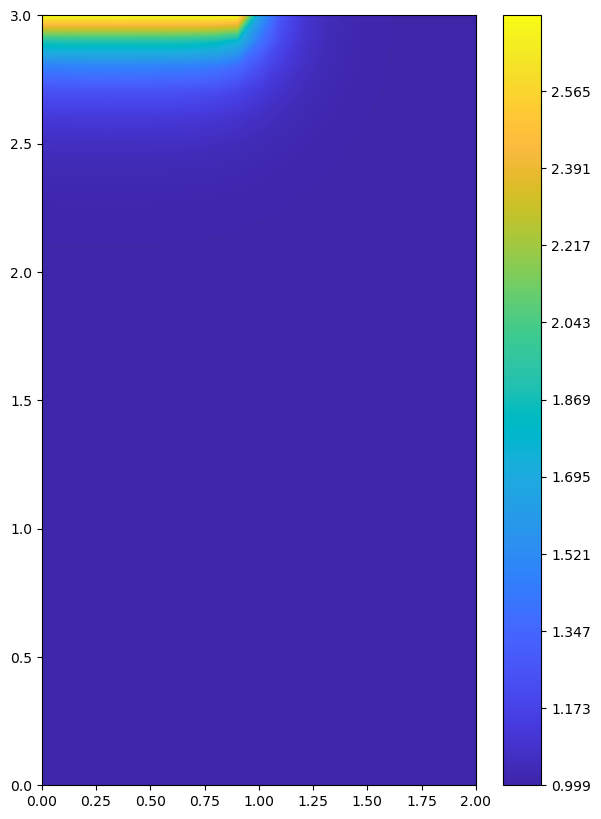

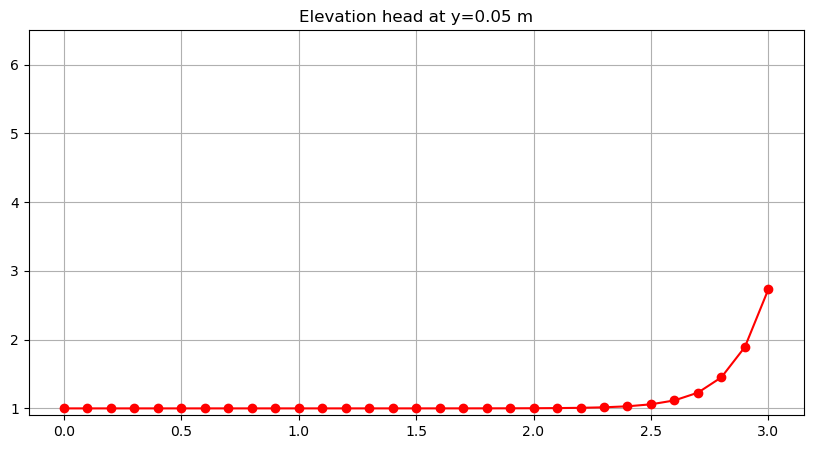

Time 0.04167
Iteration #0001, error L2 relative psi:    0.61381496513247
Iteration #0002, error L2 relative psi:    0.08606326699115
Iteration #0003, error L2 relative psi:    0.00383072611779
Iteration #0004, error L2 relative psi:    0.00207113510565
Iteration #0005, error L2 relative psi:    0.00163772658403
Iteration #0006, error L2 relative psi:    0.00129929840437
Iteration #0007, error L2 relative psi:    0.00103007934695
Iteration #0008, error L2 relative psi:    0.00081709786374
Iteration #0009, error L2 relative psi:    0.00064786674657
Iteration #0010, error L2 relative psi:    0.00051386571198
Iteration #0011, error L2 relative psi:    0.00040746750762
Iteration #0012, error L2 relative psi:    0.00032317079557
Iteration #0013, error L2 relative psi:    0.00025626857785
Iteration #0014, error L2 relative psi:    0.00020324451557
Iteration #0015, error L2 relative psi:    0.00016117385178
Iteration #0016, error L2 relative psi:    0.00012782276432
Iteration #0017, error L2 r

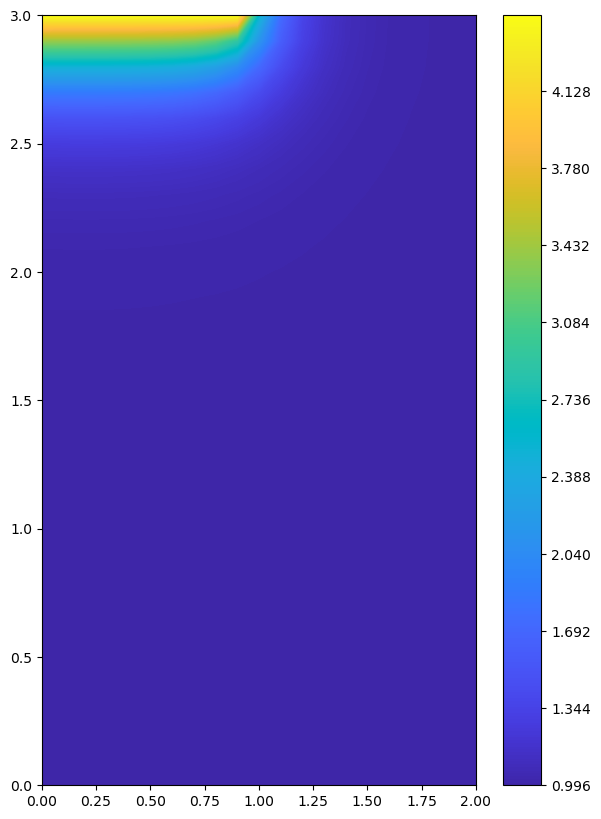

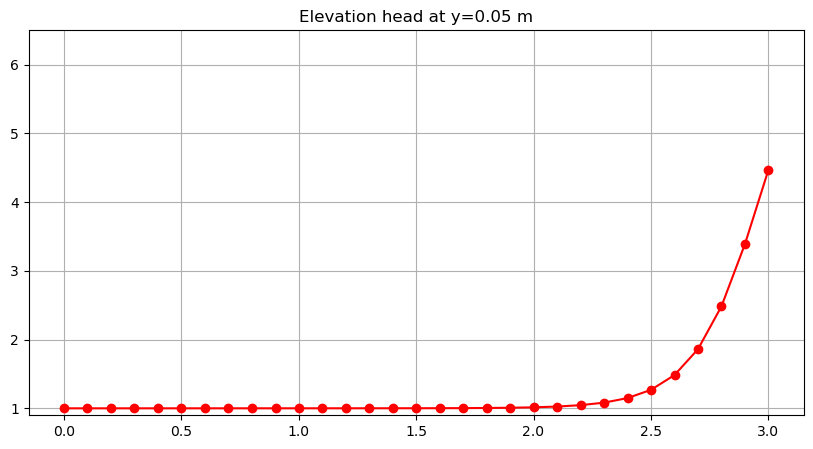

Time 0.0625
Iteration #0001, error L2 relative psi:    0.83071656671683
Iteration #0002, error L2 relative psi:    0.17355149498270
Iteration #0003, error L2 relative psi:    0.01472139582850
Iteration #0004, error L2 relative psi:    0.00612175704870
Iteration #0005, error L2 relative psi:    0.00454298984823
Iteration #0006, error L2 relative psi:    0.00338450186676
Iteration #0007, error L2 relative psi:    0.00251422781441
Iteration #0008, error L2 relative psi:    0.00187159960050
Iteration #0009, error L2 relative psi:    0.00139109215017
Iteration #0010, error L2 relative psi:    0.00103513354594
Iteration #0011, error L2 relative psi:    0.00076960602686
Iteration #0012, error L2 relative psi:    0.00057255270321
Iteration #0013, error L2 relative psi:    0.00042575378365
Iteration #0014, error L2 relative psi:    0.00031670400065
Iteration #0015, error L2 relative psi:    0.00023552428911
Iteration #0016, error L2 relative psi:    0.00017518700909
Iteration #0017, error L2 re

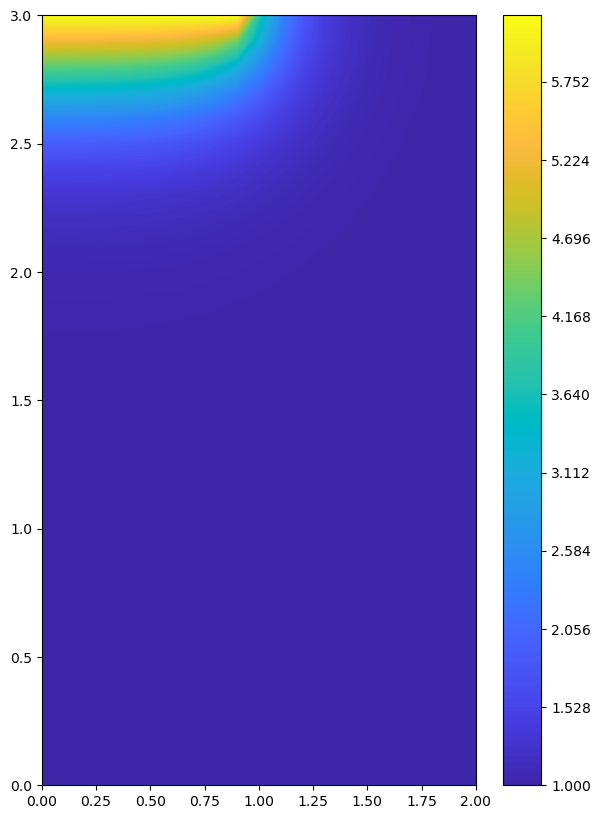

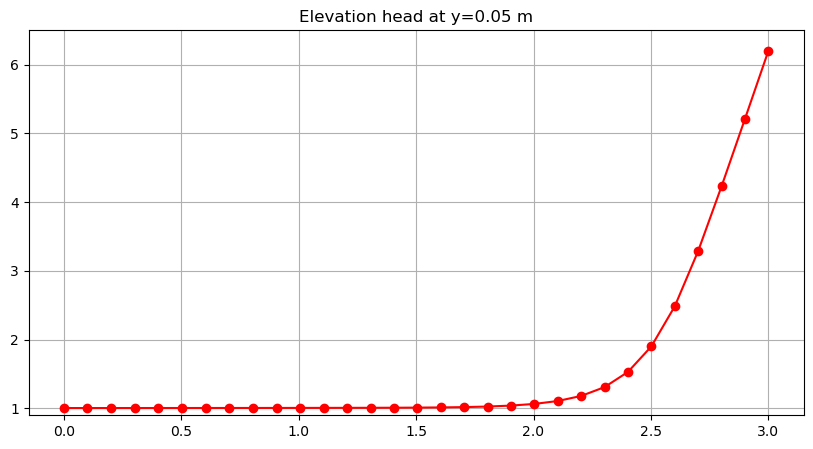

Time 0.08333
Iteration #0001, error L2 relative psi:    0.44272864554686
Iteration #0002, error L2 relative psi:    0.09499693814548
Iteration #0003, error L2 relative psi:    0.01946411563296
Iteration #0004, error L2 relative psi:    0.01104270328904
Iteration #0005, error L2 relative psi:    0.00676936908535
Iteration #0006, error L2 relative psi:    0.00419283114394
Iteration #0007, error L2 relative psi:    0.00258177027124
Iteration #0008, error L2 relative psi:    0.00159559013969
Iteration #0009, error L2 relative psi:    0.00098390656371
Iteration #0010, error L2 relative psi:    0.00060756301373
Iteration #0011, error L2 relative psi:    0.00037485017100
Iteration #0012, error L2 relative psi:    0.00023139502927
Iteration #0013, error L2 relative psi:    0.00014279361314
Iteration #0014, error L2 relative psi:    0.00008813553378
Iteration #0015, error L2 relative psi:    0.00005439254063
Iteration #0016, error L2 relative psi:    0.00003357074412



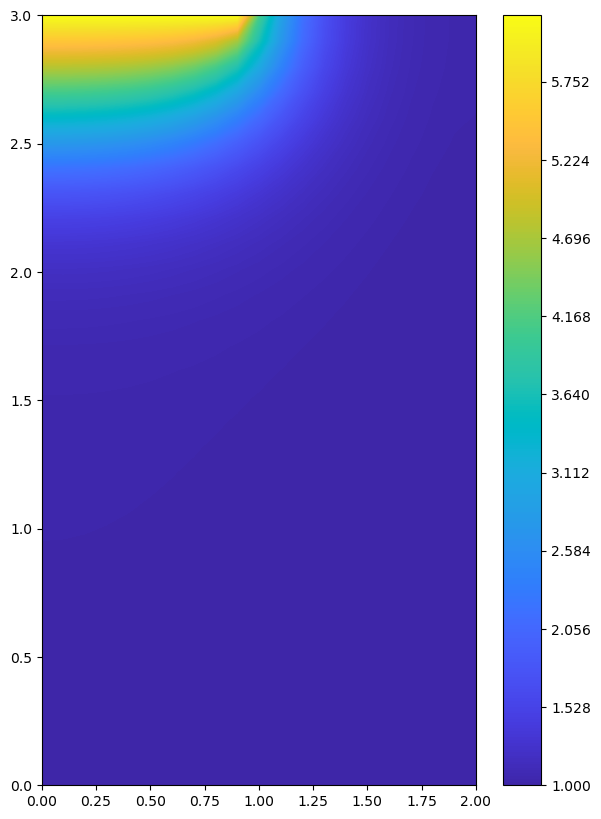

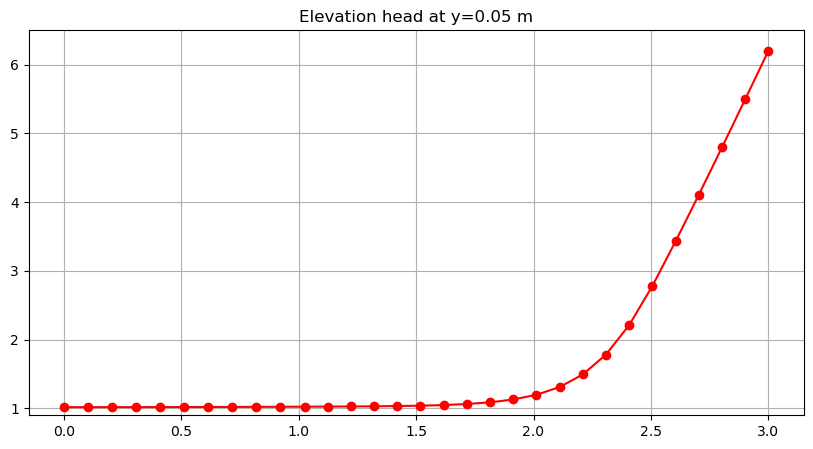

Time 0.10417
Iteration #0001, error L2 relative psi:    0.39737065735725
Iteration #0002, error L2 relative psi:    0.08175292975970
Iteration #0003, error L2 relative psi:    0.01760396534386
Iteration #0004, error L2 relative psi:    0.00615355200195
Iteration #0005, error L2 relative psi:    0.00223147872453
Iteration #0006, error L2 relative psi:    0.00080791610810
Iteration #0007, error L2 relative psi:    0.00029238989014
Iteration #0008, error L2 relative psi:    0.00010581256082
Iteration #0009, error L2 relative psi:    0.00003829144131



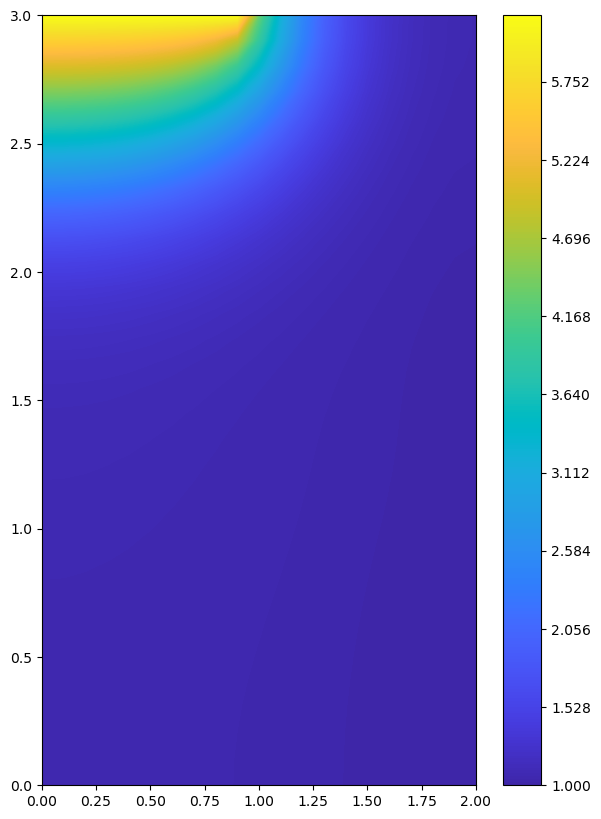

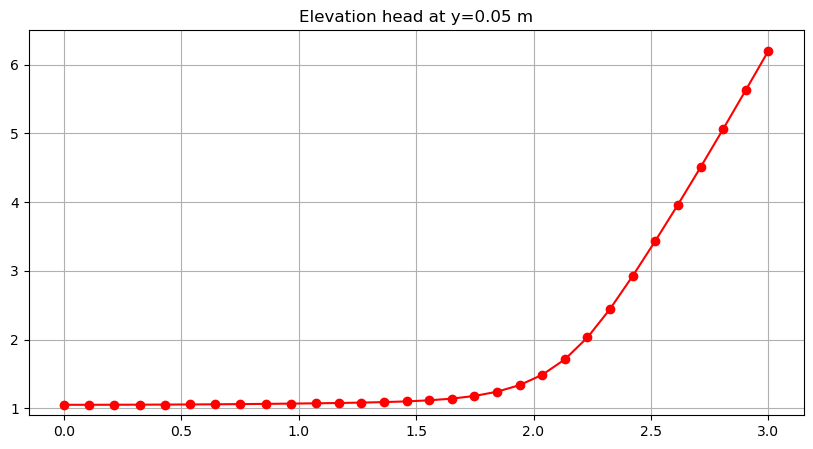

Time 0.125
Iteration #0001, error L2 relative psi:    0.43937085062474
Iteration #0002, error L2 relative psi:    0.11502583172150
Iteration #0003, error L2 relative psi:    0.01901233482280
Iteration #0004, error L2 relative psi:    0.00471274414615
Iteration #0005, error L2 relative psi:    0.00139932631984
Iteration #0006, error L2 relative psi:    0.00043120120451
Iteration #0007, error L2 relative psi:    0.00013319586843
Iteration #0008, error L2 relative psi:    0.00004123490920



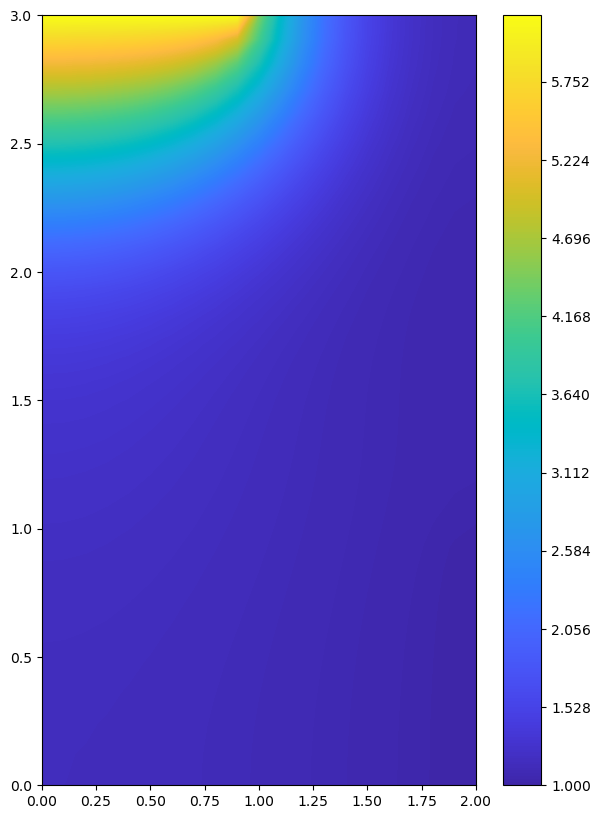

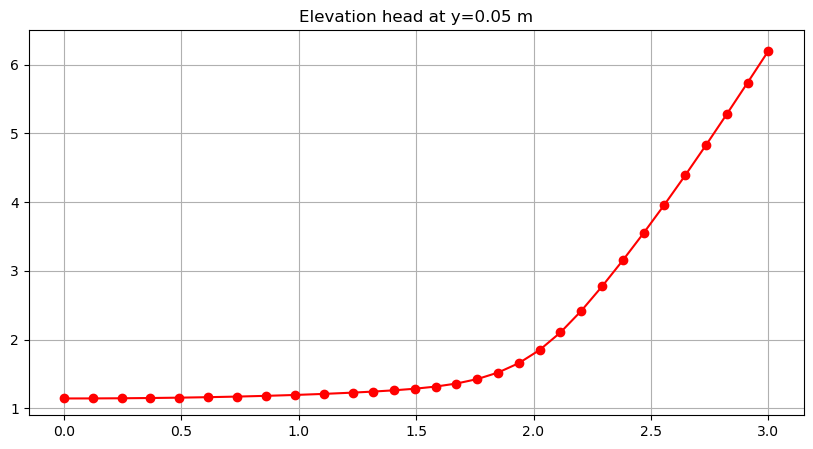

Time 0.14583
Iteration #0001, error L2 relative psi:    0.58094714787646
Iteration #0002, error L2 relative psi:    0.41246574121626
Iteration #0003, error L2 relative psi:    0.49274031504978
Iteration #0004, error L2 relative psi:    0.83199079119058
Iteration #0005, error L2 relative psi:    1.57283675382768
Iteration #0006, error L2 relative psi:   12.86238258222651
Iteration #0007, error L2 relative psi:  235.71389244499707
Iteration #0008, error L2 relative psi:  638.49334235146603
Iteration #0009, error L2 relative psi: 22588.01122894056243
Iteration #0010, error L2 relative psi: 22233.70643227695837
Iteration #0011, error L2 relative psi:  236.56885929951491
Iteration #0012, error L2 relative psi:  233.81992980058121
Iteration #0013, error L2 relative psi:  175.76920520556305
Iteration #0014, error L2 relative psi: 1865.84514378521772
Iteration #0015, error L2 relative psi: 40961724.32544195652008
Iteration #0016, error L2 relative psi: 149236399643671.03125000000000
Iteration 

KeyboardInterrupt: 

In [73]:
# Time Loop
for i in range(1, num_steps+1):
    current_time = i * dt
    print('Time ' + str(round(current_time, 5)))

    # Prepare the solution at the previous time step and ...
    prev = sol[-1].copy()
    
    debug_savers = [pp.Exporter(darcy_grid,    str(i) + '_sol_D', folder_name=os.path.join(output_directory, 'debug')), 
                    pp.Exporter(richards_grid, str(i) + '_sol_R', folder_name=os.path.join(output_directory, 'debug'))]
    save_step(sol[-1], debug_savers, 0)
        
    time_rhs = fixed_rhs.copy()

    # Non-linear loop
    for k in range(max_iterations_per_step):

        # Prepare the rhs
        rhs = time_rhs.copy()

        richards_M_h = richards_mass(prev[boundary_mask])
        rhs[richards_mask] += richards_M_h @ theta(sol[-1][richards_mask] - richards_real_height(np.tile(sol[-1][boundary_mask], ceil(richards_grid.num_nodes / boundary_grid.num_nodes)), 1+richards_grid.nodes[1, :]) ) / dt

        heights = richards_real_height(np.tile(prev[boundary_mask], ceil(richards_grid.num_nodes / boundary_grid.num_nodes)), 1+richards_grid.nodes[1, :])
        
        dtheta_mass = richards_mass_dtheta( prev[boundary_mask], prev[richards_mask] - heights )
        dtheta_eta_mass = richards_mass_eta( prev[boundary_mask], prev[richards_mask] - heights )
        
        rhs[richards_mask] +=  (dtheta_mass @ prev[richards_mask] - richards_M_h @ theta(prev[richards_mask] - heights) ) / dt
        rhs[richards_mask] -=  dtheta_eta_mass @ prev[boundary_mask] / dt

        darcy_start    = darcy_stifness(prev[boundary_mask])
        richards_start = richards_stifness(prev[boundary_mask], heights) + dtheta_mass / dt

        mid_start = darcy_restrict_to_boundary @ darcy_start @ darcy_restrict_to_boundary.T + richards_restrict_to_boundary @ (richards_start @ richards_restrict_to_boundary.T - dtheta_eta_mass / dt)
        

        spp = sps.bmat([[       darcy_remove_boundary @ darcy_start @ darcy_remove_boundary.T,                                   darcy_remove_boundary @ darcy_start @ darcy_restrict_to_boundary.T,                                                                          None],
                        [darcy_restrict_to_boundary @ darcy_start.T @ darcy_remove_boundary.T,                                                                                            mid_start, richards_restrict_to_boundary @ richards_start.T @ richards_remove_boundary.T],
                        [                                                                None, richards_remove_boundary @ (richards_start @ richards_restrict_to_boundary.T - dtheta_eta_mass / dt),        richards_remove_boundary @ richards_start @ richards_remove_boundary.T]], format='csc')


        ls = pg.LinearSystem(spp, rhs)
        ls.flag_ess_bc(dirichlet_flag(current_time), dirichlet_value(current_time))

        current = ls.solve()


        # Compute the errors (with eta). Should I consider only psi? Should I compute the error on the "actual" psi values or on the dofs
        abs_err_psi  = np.sqrt( (current - prev)[richards_mask].T @ base_richards @ (current - prev)[richards_mask] + (current - prev)[darcy_mask].T @ base_darcy @ (current - prev)[darcy_mask] )
        abs_err_prev = np.sqrt( prev[richards_mask].T @ base_richards @ prev[richards_mask] + prev[darcy_mask].T @ base_darcy @ prev[darcy_mask] )

        print('Iteration #' + format(k+1, '0' + str(ceil(log10(max_iterations_per_step)) + 1) + 'd')
              + ', error L2 relative psi: ' + format(abs_err_psi, str(5 + ceil(log10(1 / abs_tol)) + 4)
                                                     + '.' + str(ceil(log10(1 / abs_tol)) + 4) + 'f') )


        save_step(current, debug_savers, k+1)
        
        if abs_err_psi < abs_tol + rel_tol * abs_err_prev:
            break
        else:
            prev = None
            prev = current.copy()

    print('')

    sol.append( current.copy() )
    save_step(sol[-1], savers, i)

    export_csv(i, sol[-1], plot_figure=True, plot_value=True)


for saver in savers:
    saver.write_pvd([t * dt for t in range(int(T/dt)+1)])